## Atividade 5

Crie uma função para transformar uma imagem colorida em um desenho (sketch) com fundo branco e traços na cor preta.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Usuario fez upload da imagem "{name}" com tamanho {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving placa.jpg to placa.jpg
Usuario fez upload da imagem "placa.jpg" com tamanho 1148333 bytes


Importação de bibliotecas.

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 2. Solução

Construindo função que receberá uma imagem em RGB, converterá em escala de cinza e posteriormente retornará com bordas identificadas invertidas.

In [47]:
def sketch(imagem):
    # Convertendo a imagem para escala de cinza
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    
    # filtro de suavização
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # filtro de Canny para detectar as bordas
    edges = cv2.Canny(blur, 10, 70)
    
    # invertendo para ter traços preto e fundo branco
    sketch = 255 - edges
    
    return sketch

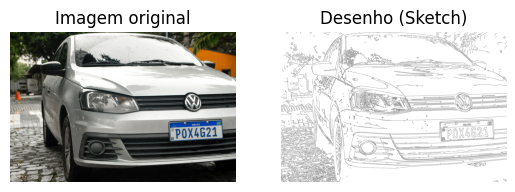

In [49]:
# Lendo a imagem
imagem_original = cv2.imread('placa.jpg')

# Obtendo o desenho (sketch) da imagem
desenho_sketch = sketch(imagem_original)

# Exibindo a imagem original e o desenho (sketch) correspondente
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB))
plt.title('Imagem original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(desenho_sketch, cmap='gray')
plt.title('Desenho (Sketch)')
plt.axis('off')

plt.show()


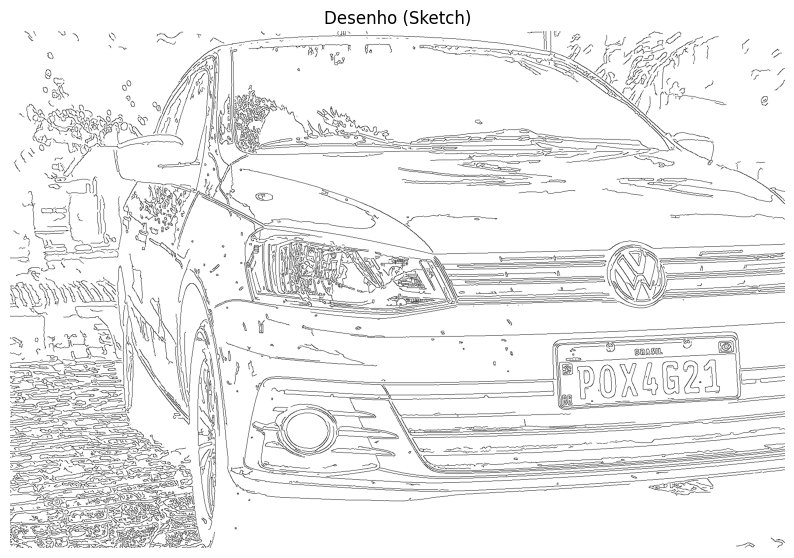

In [54]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(desenho_sketch, cv2.COLOR_BGR2RGB))
plt.title('Desenho (Sketch)')
plt.axis('off')

plt.show()

Text(0.5, 1.0, 'Original')

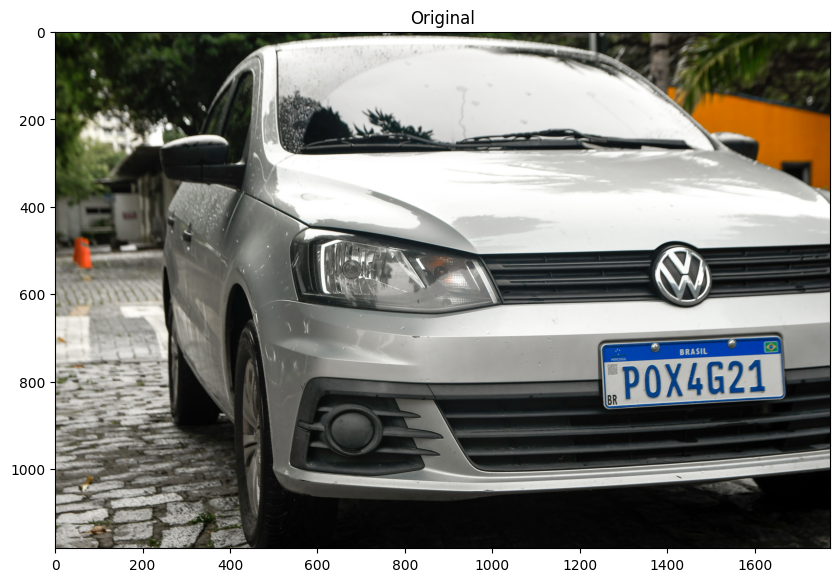

In [51]:
imagem = cv2.imread("placa.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(imagem)
plt.title("Original")

### 2. Obtendo imagem a da câmera

Este método é de uso exclusivo do Colab, uma vez que não temos acesso direto a câmera do dispositivo.

Obtido dos [snippets avançados](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq) do Google Colab.

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Função que obtem a foto da câmera do navegador e salva em uma pasta determinada.

<IPython.core.display.Javascript object>

Saved to imagens/foto.jpg


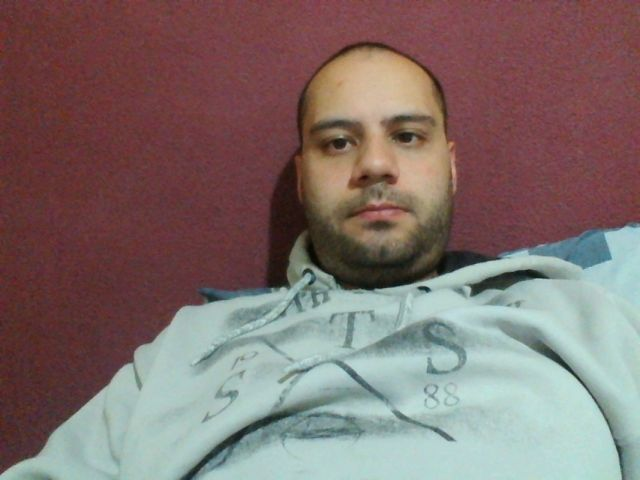

In [10]:
from IPython.display import Image
try:
  filename = take_photo("imagens/foto.jpg")
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

(-0.5, 639.5, 479.5, -0.5)

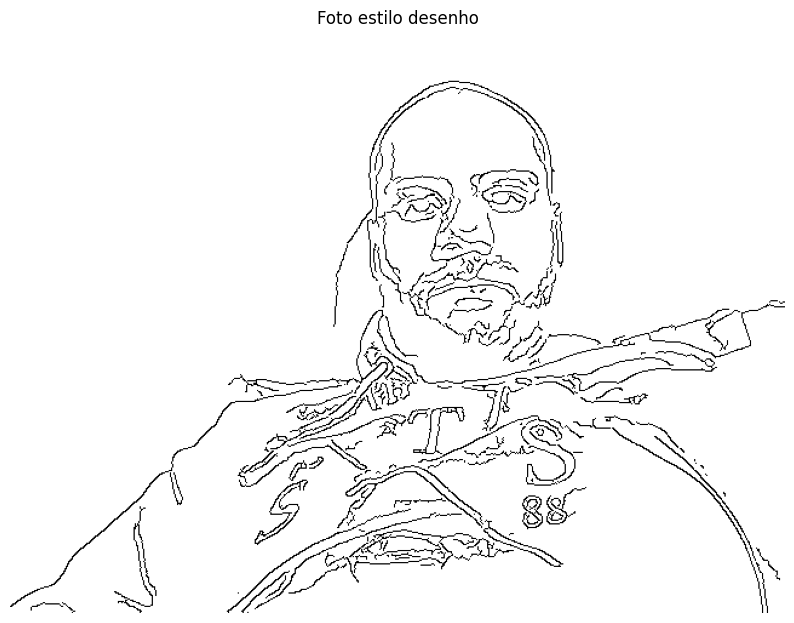

In [52]:
imagem = cv2.imread("imagens/foto.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Plotando a imagem usando a função (Sketch) para criar uma imagem tipo "desenho"
imagem_desenho = sketch(imagem)
plt.figure(figsize=(10, 10))
plt.imshow(imagem_desenho, cmap='gray')
plt.title('Foto estilo desenho')
plt.axis('off')
